# Student Mental Health Analysis Project

*(This project study about the current mental health issues, which is one of the most popular phenomenons among universities)*


**Member lists**
| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Phần I, II, câu 1 phần III|100%
|Đào Ngọc Hoa|20127500|Phần I, II , câu 2 phần III|100%

## I. Collecting data
**General: Collecting data on Kaggle**

**Link:** 
> https://www.kaggle.com/datasets/shariful07/student-mental-health?fbclid=IwAR28tzZnwqReWZ4_Y-oKhFrEk6RcayC7GazLiiHXggREmAMefijZVx93O6Q

### What subject is your data about?

*Answer: The subject is Student's Mental Health (A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA )*

### What is the source of your data?

*Answer: A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA dataset
This Data set was collected by a survey conducted by Google forms from students in **International Islamic University Malaysia** in order to examine their current academic situation and mental health*

### Do authors of this data allow you to use like this? You can check the data license

*Answer*: 

*- Yes they allow for people to use this data.*

*- Yes, I can check the data license.*


![image info](License.png)

### How did authors collect data?

*Answer: This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health*

------------

## II. Data Exploration 
(*This process is often interleaved with preprocessing*)

### Import libraries

In [1]:
# !pip install pydotplus
# !pip install imblearn
import pandas as pd #Import pandas libraries in python
import numpy as np #Import numpy libraries in python
import datetime #Import module for control date and time
import csv #Import module for reading csv files
import seaborn as sns #Import module for visualization of numeric types
import matplotlib.pyplot as plt #Import module for visualization
import os #Import module for control os
import pydotplus #Import module for decision tree visualiztion

# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from io import StringIO
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# from sklearn import preprocessing 
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline, make_pipeline




from numpy import argmax #Import module for detecting the position of max-value in datasets
from sklearn.preprocessing import LabelEncoder #Import Label Encoder for one-hot encoder for labels 
from sklearn.preprocessing import OneHotEncoder #Import Label Encoder for one-hot encoding
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import preprocessing 
from datetime import datetime, date, time, timezone
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [2]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

### Support Functions

#### Outlier Function

In [3]:
def zscore_outlier(data):
    outlier = []
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
      zscore = (i - mean) / std
      if zscore > 3:
        outlier.append(i)
    return outlier

### Read data

In [4]:
data = pd.read_csv('./data/Student Mental health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### Initial observation of the distribution of values ​​of attributes in data through visual charts

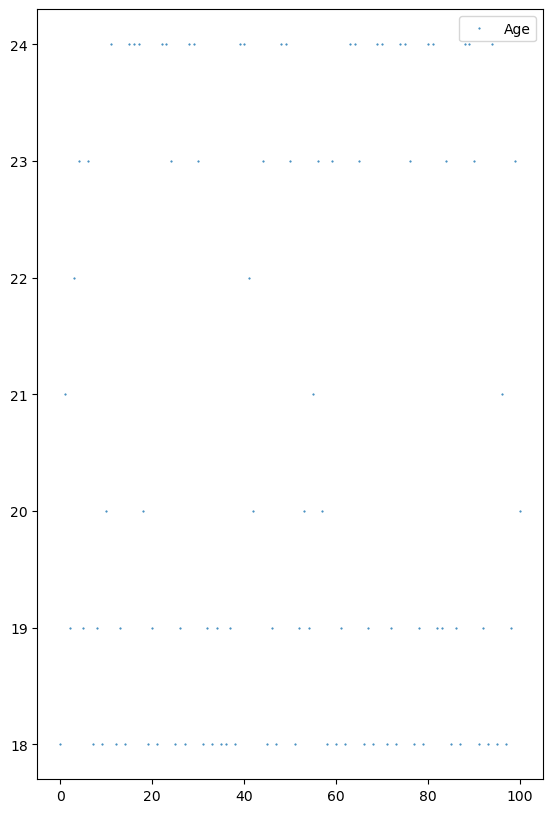

In [5]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(30, 10), markersize=1)
plt.show()

### General observation of the correlation of attributes in the data through the correlation matrix

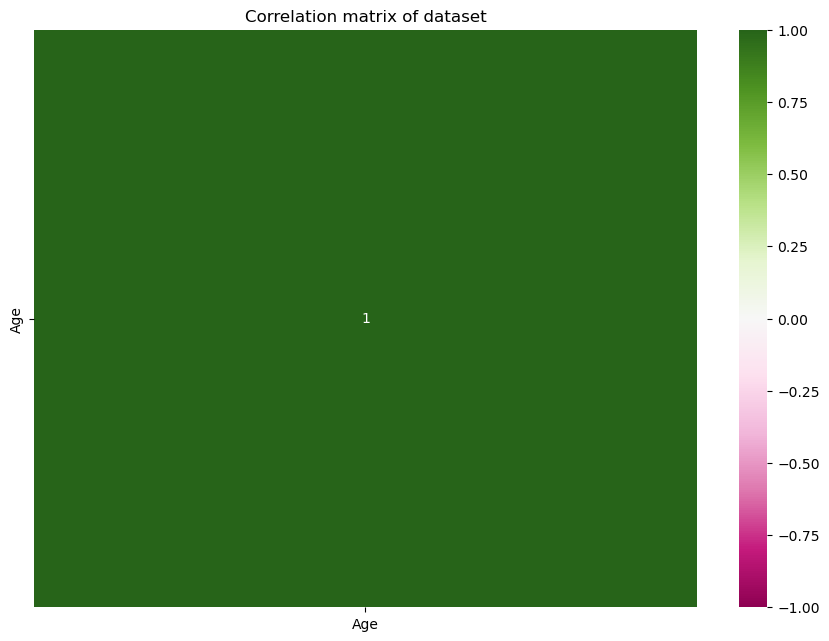

In [6]:
plt.figure(figsize=(10.7,7.5))
track_corr = sns.heatmap(data.corr(),vmin=-1, vmax=1, cmap='PiYG', annot=True)
plt.title('Correlation matrix of dataset')
plt.show()

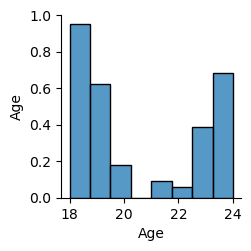

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


#### Rename columns

In [9]:
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


### Specifically observation of the distribution of values ​​of attributes in data through visual charts

#### a. How many rows and how many columns?

In [10]:
rows, cols = data.shape

*The number of rows:*

In [11]:
rows

101

*The number of columns:*

In [12]:
cols

11

#### b. What is the meaning of each row?

*Answer: Each row is a record of a student to find out whether they have any mental problems.*

#### c. Are there duplicated rows?

In [13]:
data.duplicated().sum()

0

*Answer: no duplicated.*

#### d. What is the meaning of each column?

|Atrribute|Meanings
| :------ | ---
|Timestamp|The moment that a studnent fill the from
|Gender|The gender of a student
|Age|The age of a student
|Course|The course that a student is participating
|Year|The current year of a student
|CGPA|The current GPA of a student
|Marital_Status|Whether a student married or not
|Depression| Whether a student have a sense of depression or not
|Anxiety| Whether a student have a sense of anxiety or not
|Panic attack| Whether a student have a sense of panic attack or not
|Treatment| Whether a student seek the treatment from specialists or not

#### e. What is the current data type of each column? Are there columns having inappropriate data types?

In [14]:
data.dtypes

Timestamp          object
Gender             object
Age               float64
Course             object
Year               object
CGPA               object
Marital_Status     object
Depression         object
Anxiety            object
Panic_Attack       object
Treatment          object
dtype: object

*Answer: Timestamp need to be changed to datetime.*

**Convert datatype of `Timestamp` to datatime**

In [15]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

#### f. With each numerical column, how are values distributed?

In [16]:
# YOUR CODE HERE
nume_data = data.describe()
missing_percentage = ((1-nume_data.loc['count']/rows) * 100).round(1)
nume_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                 'min': nume_data.loc['min'],
                                'max': nume_data.loc['max']})
nume_col_info_df = nume_col_info_df.T
nume_col_info_df

,Age
missing_percentage,1.0
min,18.0
max,24.0


*-> Không có gì bất thường*

#### g. With each categorical column, how are values distributed?

##### General observation

In [17]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = data.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(data)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Gender,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,2,49,7,6,2,2,2,2,2
value_percentages,"{'Female': 74.3, 'Male': 25.7}","{'BCS': 17.8, 'Engineering': 16.8, 'BIT': 9.9, 'Biomedical science': 4.0, 'KOE': 4.0, 'BENL': 2....","{'year 1': 40.6, 'Year 3': 18.8, 'Year 2': 15.8, 'year 2': 9.9, 'year 4': 7.9, 'year 3': 5.0, 'Y...","{'3.50 - 4.00': 46.5, '3.00 - 3.49': 42.6, '2.50 - 2.99': 4.0, '0 - 1.99': 4.0, '2.00 - 2.49': 2...","{'No': 84.2, 'Yes': 15.8}","{'No': 65.3, 'Yes': 34.7}","{'No': 66.3, 'Yes': 33.7}","{'No': 67.3, 'Yes': 32.7}","{'No': 94.1, 'Yes': 5.9}"


Overall, the mising percentage of all catergorical columns are 0.0%. However, there are some abnormal data we need to consider and preprocess.

##### 1. Gender

*This column is reasonable.*

In [18]:
num_gender = pd.Series(cate_col_info_df.loc['value_percentages','Gender'])

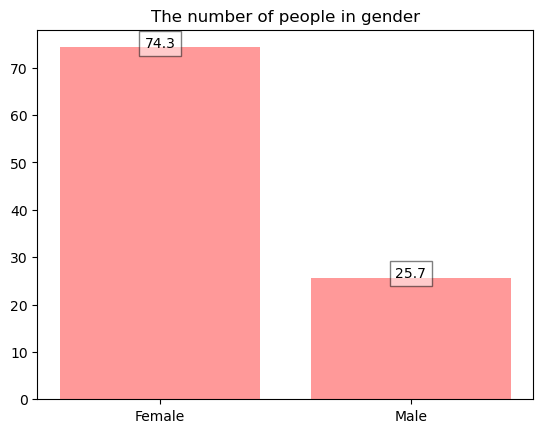

In [19]:
#VISUALIZE
plt.bar(num_gender.index , num_gender.values, alpha = 0.4, color = 'r')
plt.title("The number of people in gender")
for i in range(len(num_gender.index)):
    plt.text(i, num_gender.values[i], num_gender.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

In [20]:
#STATISTICS
num_gender.describe()

count     2.00000
mean     50.00000
std      34.36539
min      25.70000
25%      37.85000
50%      50.00000
75%      62.15000
max      74.30000
dtype: float64

In [21]:
#OUTLIERS
outlier_num_gender = zscore_outlier(num_gender)
outlier_num_gender

[]

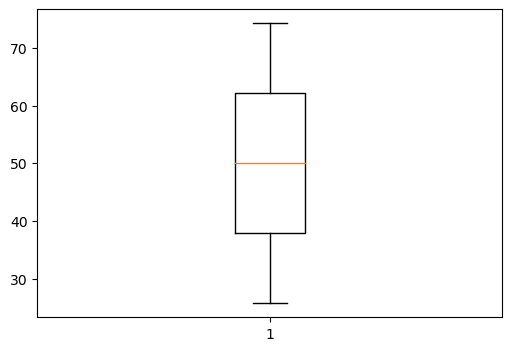

In [22]:
#BOXPLOT
fig = plt.figure(figsize=(6, 4))
plt.boxplot(num_gender)
plt.show()

##### 2. Course

In [23]:
#VISUALIZE BY EYES
data['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

As what we can see, this column is unvalid, since `Psychology` and `psychology` are the same majors; `engin`, `engine` and `engineering` are the same majors; `Fiqh fatwa` and `fiqh` are similar, for example. Therefore, in the following step, I would preprocess this column.

In [24]:
#STANDARDIZED DATA
data['Course'] = data['Course'].str.strip()
data['Course'] = data['Course'].str.capitalize()
data['Course'].replace({'Engin': 'Engineering' , 'Engine':'Engineering' ,'Bit':'It','Kirkhs': 'Irkhs', 'Fiqh fatwa': 'Fiqh', 'Laws': 'Law'} , inplace = True)

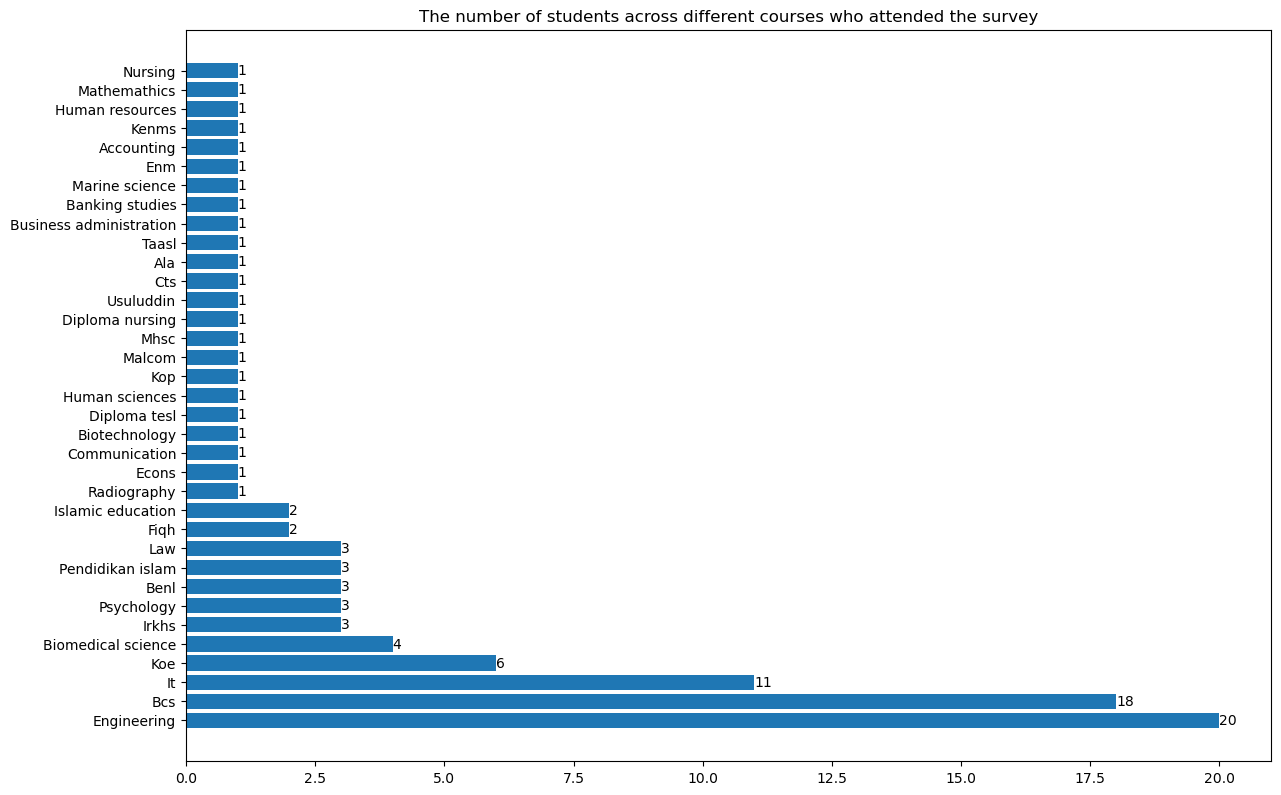

In [25]:
#VISUALIZE THE CURRENT COURSES
courses = data['Course'].value_counts()
fig, ax = plt.subplots(figsize=(14,9.5))
bars = ax.barh(courses.index , courses.values)
ax.bar_label(bars)
plt.title('The number of students across different courses who attended the survey')
plt.show()

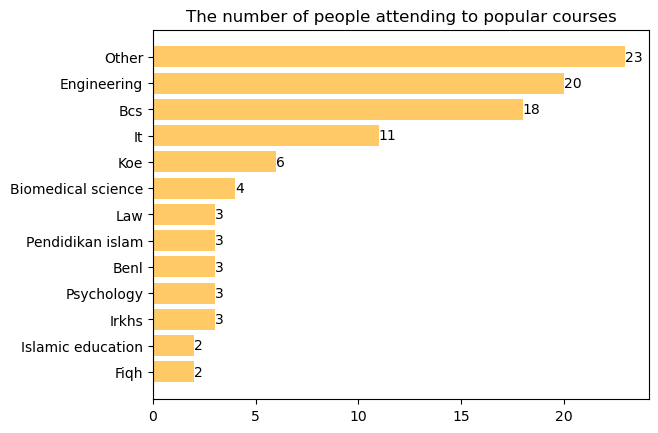

In [26]:
#VISUALIZE THE POPULAR COURSES
other_courses = courses[courses <=1].sum()

results = pd.concat([pd.DataFrame(courses[courses > 1]),pd.DataFrame({'Course' : other_courses}, index=[0])],ignore_index=False)

index_labels= list(results.index)
index_labels.pop()
index_labels.append('Other')

results.index = index_labels
results = results['Course']
results = results.sort_values(ascending = True)

fig, ax = plt.subplots()
bars = ax.barh(results.index, results.values, color = 'orange', alpha = 0.6)

ax.bar_label(bars)
plt.title("The number of people attending to popular courses")
plt.show()

##### 3. Year of study

In [27]:
#VISUALIZE BY EYES
data['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

As we can see, `year 1` and `Year 1` are not different, for instance, so I would preprocess it.

In [28]:
data['Year'] = [i[len(i) - 1] for i in data['Year']]
num_years = data['Year'].value_counts()
num_years = num_years.sort_index()

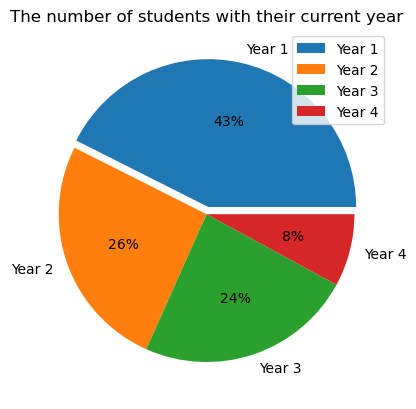

In [29]:
##VISUALIZE BY IMAGE
myexplode = [0.05, 0, 0, 0]
total = sum(num_years)
plt.pie(num_years, labels = 'Year ' + num_years.index, explode = myexplode, autopct=lambda p: '{:.0f}%'.format(p * total / 100))
plt.title("The number of students with their current year")
plt.legend()
plt.show()

##### 4. What is your CGPA?

In [30]:
#VISUALIZE BY EYES
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

As we can see, `3.50 - 4.00` and `3.50 - 4.00` are similar, so we would fix it.

In [31]:
#STANDARDIZED DATA
data['CGPA'] = data['CGPA'].str.strip()
num_CGPA = data['CGPA'].value_counts()
num_CGPA = num_CGPA.sort_index()
num_CGPA

0 - 1.99        4
2.00 - 2.49     2
2.50 - 2.99     4
3.00 - 3.49    43
3.50 - 4.00    48
Name: CGPA, dtype: int64

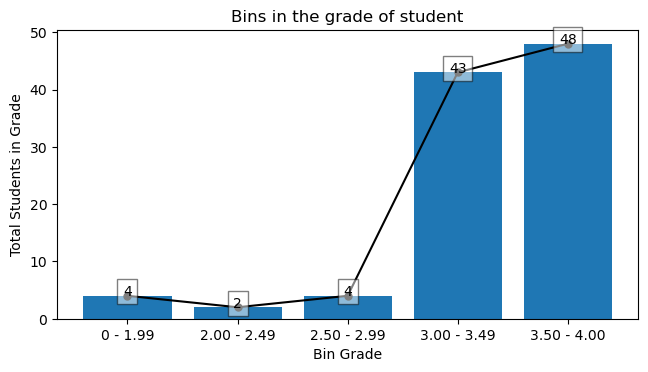

In [32]:
#VISUALIZE BY IMAGE
plt.figure(figsize=(7.5,3.75))
plt.bar(num_CGPA.index , num_CGPA.values)
plt.xlabel("Bin Grade")
plt.ylabel("Total Students in Grade")
plt.title("Bins in the grade of student")
for i in range(len(num_CGPA.index)):
    plt.text(i, num_CGPA.values[i], num_CGPA.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
    
plt.plot(num_CGPA.values, marker='.', color='black', ms=10)
plt.show()

*Qua biểu đồ trên, ta có thể thấy những người điền phiếu khảo sát đa phần có học lực khá giỏi, với GPA từ `3.0` trở lên*

##### 5. Marital status

In [33]:
#GET DATA 
marital_status = data[['Marital_Status', 'Gender']]
results_status = marital_status.groupby(['Marital_Status','Gender']).size()

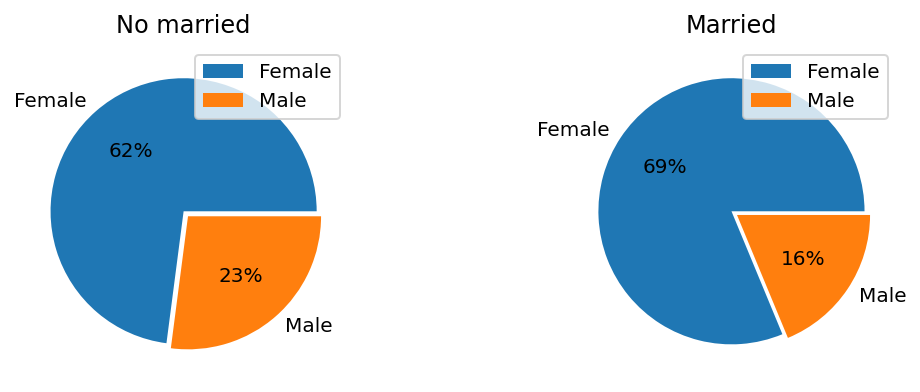

In [34]:
#VISUALIZE BY IMAGE AND COMPARE NO MARRIED GROUP AND MARRIED GROUP
#THE SAME FIGURE FOR BOTH SUBPLOTS
fig = plt.figure(figsize=(9,3),dpi=144)

explode = (0, 0.05)
total = sum(results_status['No'])
ax1 = fig.add_subplot(121)
ax1.pie(results_status['No'], labels = results_status['No'].index, 
        autopct=lambda p: '{:.0f}%'.format(p * total / 100), explode=explode)
ax1.set_title('No married')
ax1.legend()


total = sum(results_status['No'])
ax2 = fig.add_subplot(122)
ax2.set_title('Married')
ax2.pie(results_status['Yes'], labels = results_status['Yes'].index, 
        autopct=lambda p: '{:.0f}%'.format(p * total / 100), explode=explode)
ax2.legend()
plt.show()

##### 6. Do you have Depression?

In [35]:
#GET DATA
num_depression = pd.Series(cate_col_info_df.loc['value_percentages','Depression'])

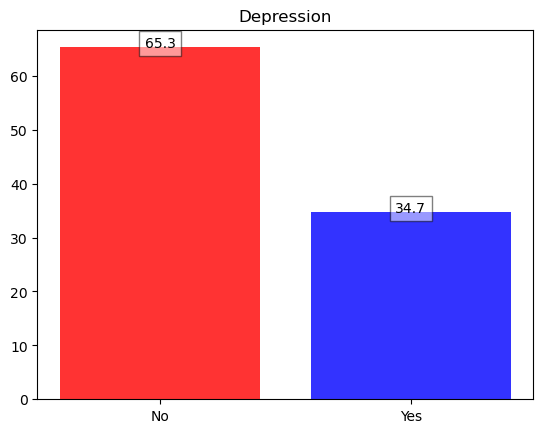

In [36]:
#VISUALIZE BY IMAGE
plt.bar(num_depression.index , num_depression.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("Depression")
for i in range(len(num_depression.index)):
    plt.text(i, num_depression.values[i], num_depression.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 7. Do you have Anxiety?

In [37]:
#GET DATA
num_anxiety = pd.Series(cate_col_info_df.loc['value_percentages','Anxiety'])

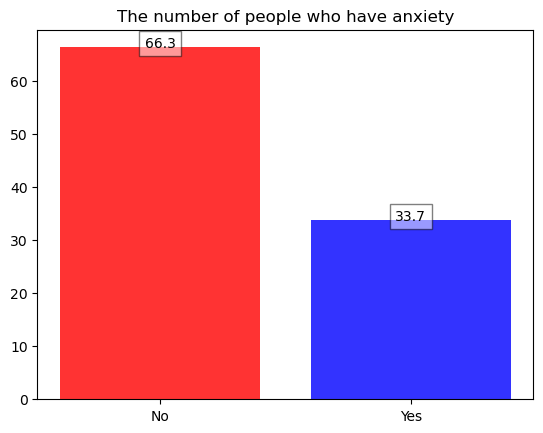

In [38]:
#VISUALIZE BY IMAGE
plt.bar(num_anxiety.index , num_anxiety.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of people who have anxiety")
for i in range(len(num_anxiety.index)):
    plt.text(i, num_anxiety.values[i], num_anxiety.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 8. Do you have Panic attack?

In [39]:
#GET DATA
num_panic = pd.Series(cate_col_info_df.loc['value_percentages','Panic_Attack'])

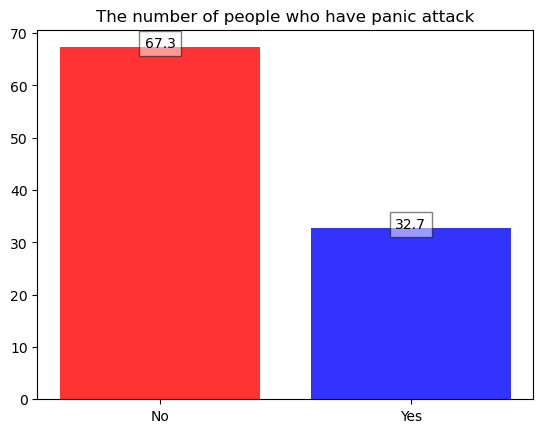

In [40]:
#VISUALIZE BY IMAGE
plt.bar(num_panic.index , num_panic.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of people who have panic attack")


for i in range(len(num_panic.index)):
    plt.text(i, num_panic.values[i], num_panic.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 9. Did you seek any specialist for a treatment?

In [41]:
#GET DATA
num_spe = pd.Series(cate_col_info_df.loc['value_percentages','Treatment'])

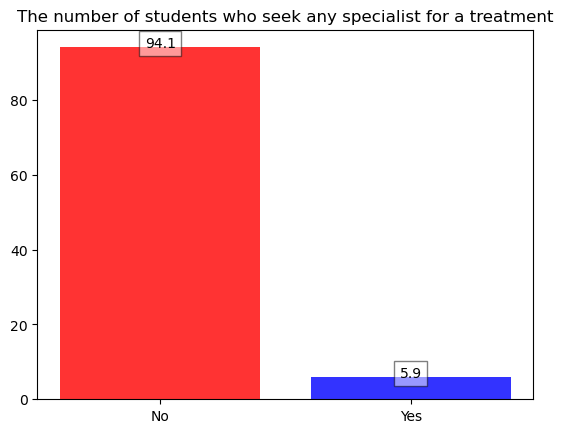

In [42]:
plt.bar(num_spe.index , num_spe.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of students who seek any specialist for a treatment")
for i in range(len(num_spe.index)):
    plt.text(i, num_spe.values[i], num_spe.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 10. Age

In [43]:
#GET DATA
num_age = pd.Series(data['Age']).value_counts().sort_index()
num_age

18.0    32
19.0    21
20.0     6
21.0     3
22.0     2
23.0    13
24.0    23
Name: Age, dtype: int64

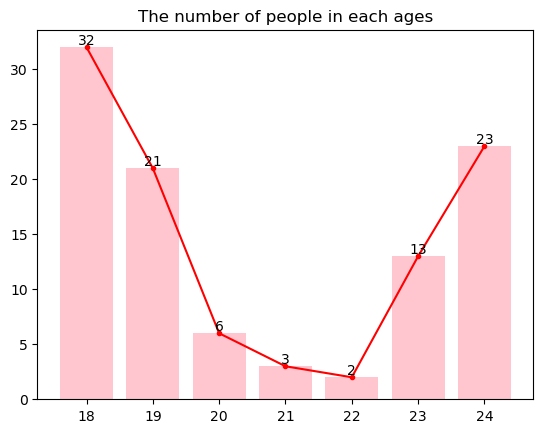

In [44]:
#VISUALIZE BY IMAGE
fig, ax = plt.subplots()
bars = ax.bar(num_age.index, num_age.values, color = 'pink', alpha = 0.9)
ax.bar_label(bars)
plt.plot(num_age, marker='.', color='r')
plt.title("The number of people in each ages")
plt.show()

-------------------

# III. Asking meaningful questions

# Question 1: <center>Are there any connections between the students' background and the current mental health issues?</center>
**Introduction:**
The background (academics environment and current situation) can influence either positively or negatively a person’s mental well-being. These factors can be current year of study, marial status, age, ...  In this project, we would like to study the relationship between students' background and their mental health issues. Finding this connection would help schools give useful advices for students as well as prepare mental health support for students.

**Step summary:**
1. **Year analysis**
2. **CGPA analysis**
3. **Age analysis**
4. **Major analysis**
5. **Marital Status Analysis**
6. **Modeling**

### Years analysis

First of all, we should know the size of our data.

In [45]:
#PREPARE DATA FOR VISUALIZE
years = data['Year'].value_counts()
years = years.sort_index()
years
score_series = pd.Series(years.values)
x_labels = years.index

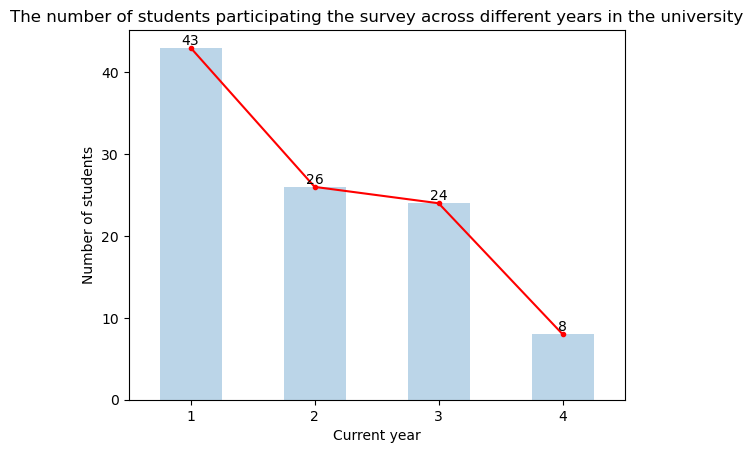

In [46]:
#VISUALIZE
plt.figure()
fig = score_series.plot(kind='bar', alpha=0.3)
fig.set_xticklabels(x_labels, rotation = 'horizontal')
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xlabel('Current year')
fig.set_ylabel('Number of students')
#plt.grid(True)
plt.plot(years.values, marker = ".", color = 'r')
plt.title("The number of students participating the survey across different years in the university")
plt.show()

At the first glance, the 1st year students has more consideration to mental health problems, while just a few 4th year students take part in this survey. It seem that the level of caring about their mental health has declined each year.

In [47]:
df= data.replace('No',np.nan).groupby(['Year']).count()
df

,Timestamp,Gender,Age,Course,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
Year,,,,,,,,,,
1,43,43,42,43,43,1,14,14,14,3
2,26,26,26,26,26,7,10,10,8,2
3,24,24,24,24,24,7,10,8,10,1
4,8,8,8,8,8,1,1,2,1,0


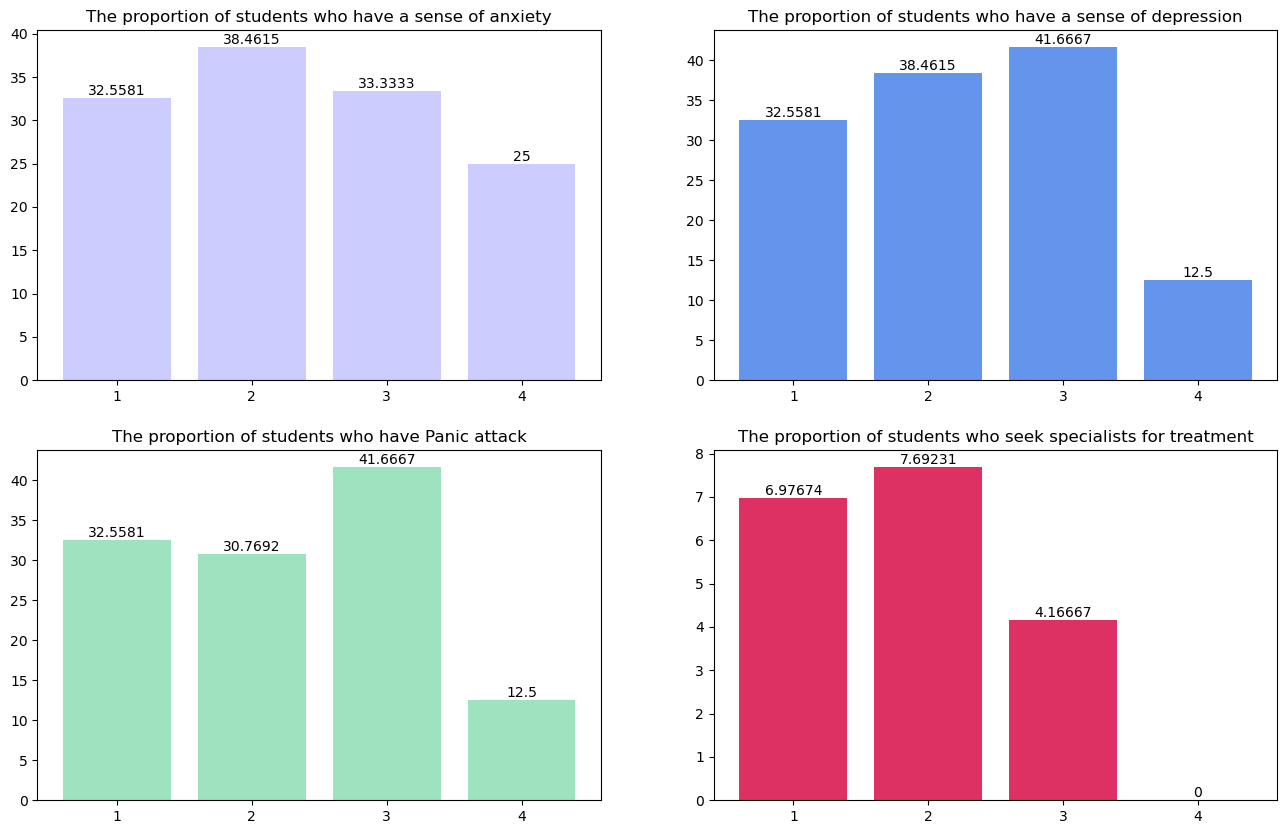

In [48]:
# VISUALIZE
fig, ax = plt.subplots(2,2,figsize=(16, 10))
bars= ax[0][0].bar(df.index, df['Anxiety']/df['Timestamp']*100,color='#CCCCFF')
ax[0][0].bar_label(bars)
ax[0][0].set_title('The proportion of students who have a sense of anxiety')

bars= ax[0][1].bar(df.index, df['Depression']/df['Timestamp']*100,color='#6495ED')
ax[0][1].bar_label(bars)
ax[0][1].set_title('The proportion of students who have a sense of depression')

bars= ax[1][0].bar(df.index, df['Panic_Attack']/df['Timestamp']*100,color='#9FE2BF')
ax[1][0].bar_label(bars)
ax[1][0].set_title('The proportion of students who have Panic attack')

bars= ax[1][1].bar(df.index, df['Treatment']/df['Timestamp']*100,color='#DE3163')
ax[1][1].bar_label(bars)
ax[1][1].set_title('The proportion of students who seek specialists for treatment')

plt.show()

A interesting point is that although 1st year students ranks the first position of the number of participants, the percentage of participants who are 2nd or 3rd year have higher senses of anxiety, depression and panic attack.

Another interesting point is that the proportion of 1st and 2nd year students who seek for treatment are quite high, while the 3rd students just makes up with 4.17%.

## CGPA Analysis

Secondly, we will analyse data with respect to the current GPA. **Is having better study results effect the mental health?**

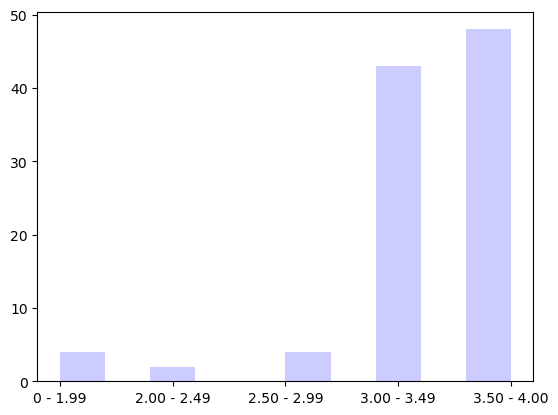

In [49]:
plt.hist(data['CGPA'].sort_values(),color='#CCCCFF')
plt.show() 

So, we can see that the majority of students whor are interested in this survey have good grades. Further analysis would be hard since the number of lower grade students is so little. So I would group these student to one group `0-2.99`.

In [50]:
data['CGPA'].replace({'0 - 1.99':'0 - 2.99','2.00 - 2.49':'0 - 2.99','2.50 - 2.99':'0 - 2.99'},inplace=True)
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '0 - 2.99'], dtype=object)

In [51]:
data['CGPA'].replace({'0-1.99':'0-2.99','2-2.49':'0-2.99','2.5-2.99':'0-2.99'},inplace=True)
df = df= data.replace('No',np.nan).groupby(['CGPA','Gender']).count().reset_index(level=1)
df

,Gender,Timestamp,Age,Course,Year,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
CGPA,,,,,,,,,,
0 - 2.99,Female,7,7,7,7,2,3,1,4,2
0 - 2.99,Male,3,2,3,3,0,0,0,1,0
3.00 - 3.49,Female,29,29,29,29,5,14,9,7,0
3.00 - 3.49,Male,14,14,14,14,2,5,6,2,0
3.50 - 4.00,Female,39,39,39,39,6,12,14,14,3
3.50 - 4.00,Male,9,9,9,9,1,1,4,5,1


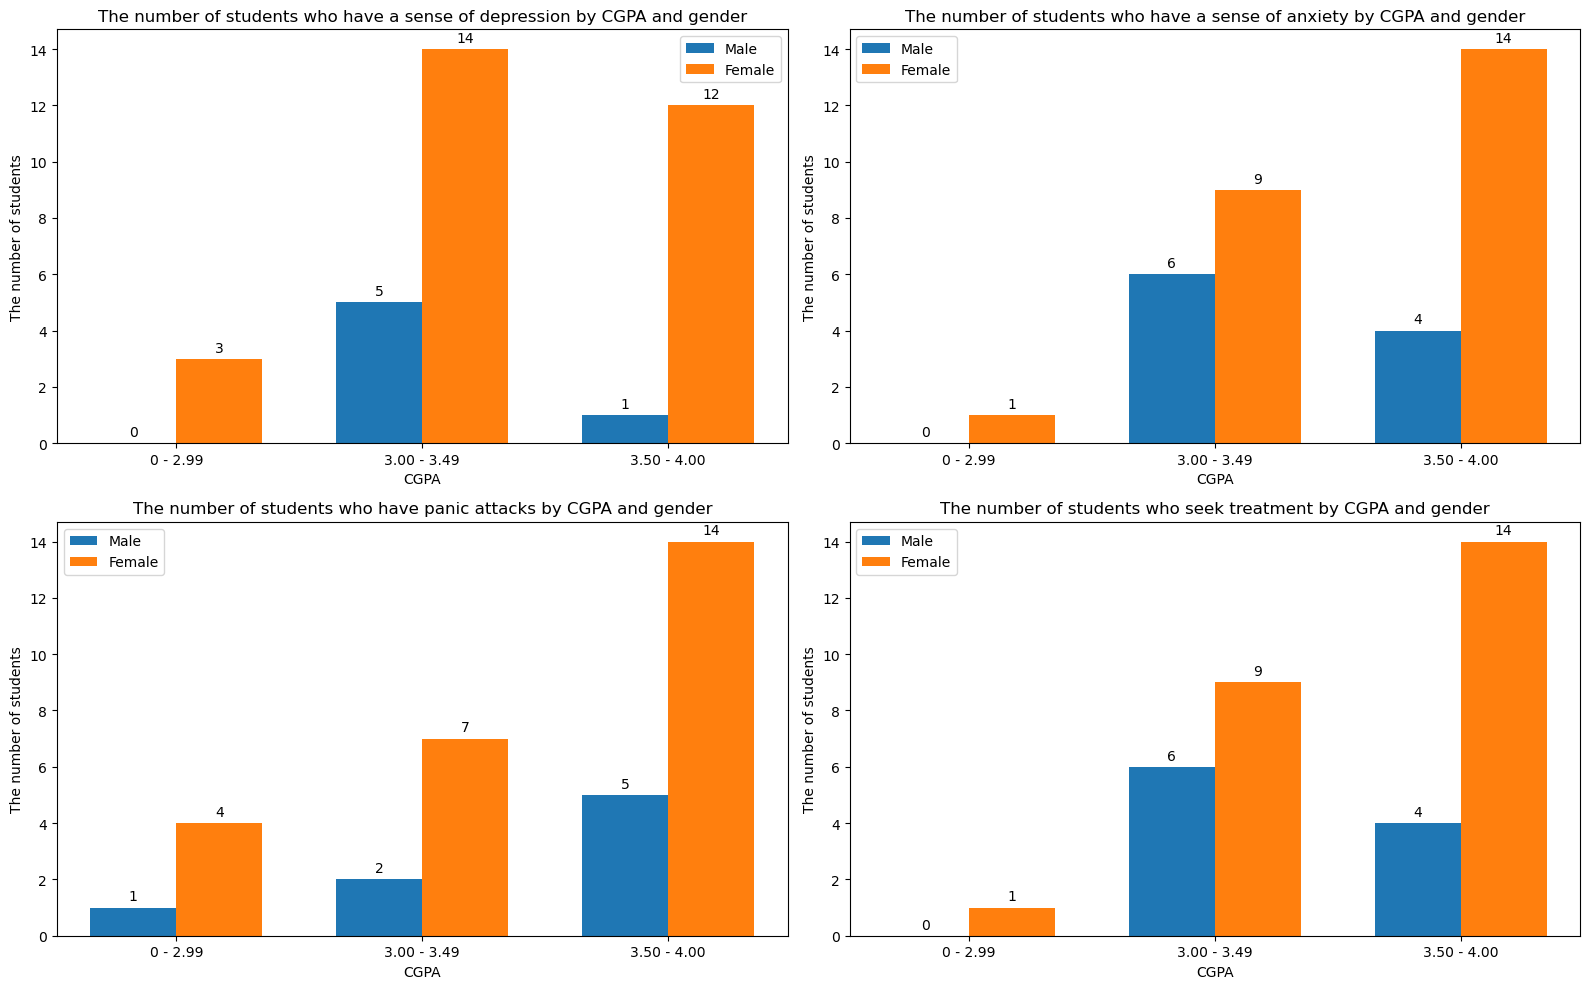

In [52]:
labels = ['0 - 2.99','3.00 - 3.49','3.50 - 4.00']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2,2,figsize=(16, 10))
rects1 = ax[0][0].bar(x - width/2, df[df['Gender']=='Male']['Depression'],width, label='Male')
rects2 = ax[0][0].bar(x + width/2,  df[df['Gender']=='Female']['Depression'],width, label='Female')

# Depression
ax[0][0].set_ylabel('The number of students')
ax[0][0].set_xlabel('CGPA')
ax[0][0].set_title('The number of students who have a sense of depression by CGPA and gender')
ax[0][0].set_xticks(np.arange(len(labels)))
ax[0][0].set_xticklabels(labels)
ax[0][0].legend()

ax[0][0].bar_label(rects1, padding=3)
ax[0][0].bar_label(rects2, padding=3)

#Anxiety
rects1 = ax[0][1].bar(x - width/2, df[df['Gender']=='Male']['Anxiety'],width, label='Male')
rects2 = ax[0][1].bar(x + width/2,  df[df['Gender']=='Female']['Anxiety'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0][1].set_ylabel('The number of students')
ax[0][1].set_xlabel('CGPA')
ax[0][1].set_title('The number of students who have a sense of anxiety by CGPA and gender')
ax[0][1].set_xticks(np.arange(len(labels)))
ax[0][1].set_xticklabels(labels)
ax[0][1].legend()

ax[0][1].bar_label(rects1, padding=3)
ax[0][1].bar_label(rects2, padding=3)

#Panic Attack
rects1 = ax[1][0].bar(x - width/2, df[df['Gender']=='Male']['Panic_Attack'],width, label='Male')
rects2 = ax[1][0].bar(x + width/2,  df[df['Gender']=='Female']['Panic_Attack'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1][0].set_ylabel('The number of students')
ax[1][0].set_xlabel('CGPA')
ax[1][0].set_title('The number of students who have panic attacks by CGPA and gender')
ax[1][0].set_xticks(np.arange(len(labels)))
ax[1][0].set_xticklabels(labels)
ax[1][0].legend()

ax[1][0].bar_label(rects1, padding=3)
ax[1][0].bar_label(rects2, padding=3)

#treatment
rects1 = ax[1][1].bar(x - width/2, df[df['Gender']=='Male']['Anxiety'],width, label='Male')
rects2 = ax[1][1].bar(x + width/2,  df[df['Gender']=='Female']['Anxiety'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1][1].set_ylabel('The number of students')
ax[1][1].set_xlabel('CGPA')
ax[1][1].set_title('The number of students who seek treatment by CGPA and gender')
ax[1][1].set_xticks(np.arange(len(labels)))
ax[1][1].set_xticklabels(labels)
ax[1][1].legend()

ax[1][1].bar_label(rects1, padding=3)
ax[1][1].bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()
plt.show()

The visual representation of the GPA analysis with added gender dimensionality has suggested that the higher GPA is, the higher the sense of mental health issues is. On the other hand, many felmale students suppose that they are suffering from mental health problems.

## Age analysis

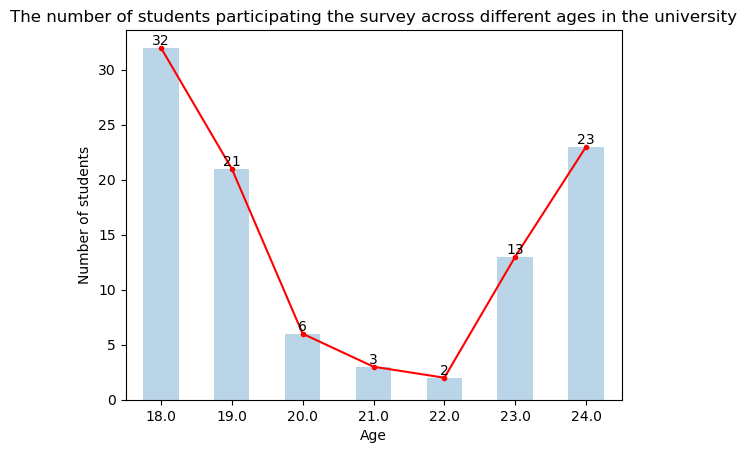

In [53]:
years = data['Age'].value_counts()
years = years.sort_index()
years
score_series = pd.Series(years.values)
x_labels = years.index
plt.figure()
fig = score_series.plot(kind='bar', alpha=0.3)
fig.set_xticklabels(x_labels, rotation = 'horizontal')
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xlabel('Age')
fig.set_ylabel('Number of students')
#plt.grid(True)
plt.plot(years.values, marker = ".", color = 'r')
plt.title("The number of students participating the survey across different ages in the university")
plt.show()

Clearly, the age distribution has a tendancy to be seperated into 2 groups `18 - 21`,`21-24`. SO For analysis further, I would devide students into 2 group: low age, high age.

In [54]:
bins = [17,21,24]
data['Age_Bins'] = pd.cut(data.Age, bins).astype(str)

In [55]:
df = data.replace('No',np.nan).groupby(['Age_Bins']).count()
df

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
Age_Bins,,,,,,,,,,,
"(17, 21]",62,62,62,62,62,62,8,23,24,19,3
"(21, 24]",38,38,38,38,38,38,8,12,10,14,3
nan,1,1,0,1,1,1,0,0,0,0,0


In [56]:
df.loc['(17, 21]']

Timestamp         62
Gender            62
Age               62
Course            62
Year              62
CGPA              62
Marital_Status     8
Depression        23
Anxiety           24
Panic_Attack      19
Treatment          3
Name: (17, 21], dtype: int64

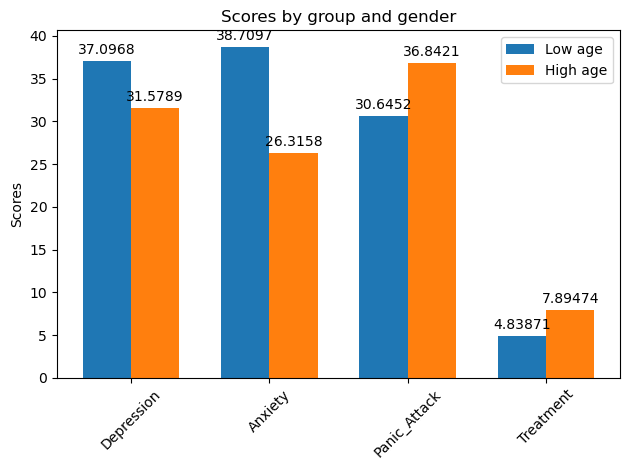

In [57]:
labels = ['Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df.loc['(17, 21]',labels]/df.loc['(17, 21]','Timestamp']*100,width, label='Low age')
rects2 = ax.bar(x + width/2,  df.loc['(21, 24]',labels]/df.loc['(21, 24]','Timestamp']*100,width, label='High age')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

We can see that low-age students have more feelings of anxiety and depression, while the risk of panic attack and the ratio of seeking treatment from doctor is larger in the high-age group.

## Major analysis

As you see, students who involve in this survey come from various courses, so for futher analysis, I would devide these courses into 4 different catergories: `Arts, Humanities and Social Sciences`,`Engineering and Technology`,`Human Health` and `Others`

In [58]:
data['Major'] = data['Course'].replace({'Accounting':'Others',
                                      'Ala':'Arts, Humanities and Social Sciences',
                                      'Banking studies':'Others',
                                      'Bcs':'Engineering and Technology',
                                      'Benl':'Arts, Humanities and Social Sciences',
                                      'Biomedical science':'Human Health',
                                      'Biotechnology':'Engineering and Technology',
                                      'Business administration':'Others',
                                      'Communication':'Arts, Humanities and Social Sciences',
                                      'Cts':'Others',
                                      'Diploma nursing':'Human Health',
                                      'Diploma tesl':'Arts, Humanities and Social Sciences',
                                      'Econs':'Others',
                                      'Engineering':'Engineering and Technology',
                                      'Enm':'Engineering and Technology',
                                      'Fiqh':'Arts, Humanities and Social Sciences',
                                      'Human resources':'Others',
                                      'Human sciences':'Arts, Humanities and Social Sciences',
                                      'Irkhs':'Arts, Humanities and Social Sciences',
                                      'Islamic education':'Arts, Humanities and Social Sciences',
                                      'It':'Engineering and Technology',
                                      'Kenms':'Others',
                                      'Koe':'Engineering and Technology',
                                      'Kop':'Human Health',
                                      'Law':'Arts, Humanities and Social Sciences',
                                      'Malcom':'Arts, Humanities and Social Sciences',
                                      'Marine science':'Others',
                                      'Mathemathics':'Others',
                                      'Mhsc':'Human Health',
                                      'Nursing':'Human Health',
                                      'Pendidikan islam':'Arts, Humanities and Social Sciences',
                                      'Psychology':'Human Health',
                                      'Radiography':'Human Health',
                                      'Taasl':'Arts, Humanities and Social Sciences',
                                      'Usuluddin':'Arts, Humanities and Social Sciences'})
data.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment,Age_Bins,Major
0,2020-08-07 12:02:00,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No,"(17, 21]",Engineering and Technology
1,2020-08-07 12:04:00,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No,"(17, 21]","Arts, Humanities and Social Sciences"
2,2020-08-07 12:05:00,Male,19.0,It,1,3.00 - 3.49,No,Yes,Yes,Yes,No,"(17, 21]",Engineering and Technology
3,2020-08-07 12:06:00,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No,"(21, 24]","Arts, Humanities and Social Sciences"
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No,"(21, 24]",Others


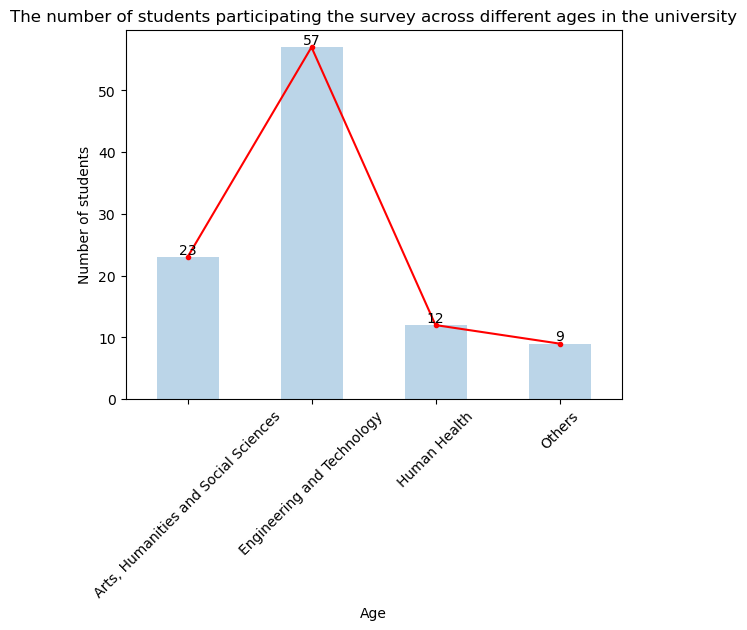

In [59]:
years = data['Major'].value_counts()
years = years.sort_index()
years
score_series = pd.Series(years.values)
x_labels = years.index
plt.figure()
fig = score_series.plot(kind='bar', alpha=0.3)
fig.set_xticklabels(x_labels, rotation = 45)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xlabel('Age')
fig.set_ylabel('Number of students')
#plt.grid(True)
plt.plot(years.values, marker = ".", color = 'r')
plt.title("The number of students participating the survey across different ages in the university")
plt.show()

In [60]:
df = data.replace('No',np.nan).groupby(['Major','Gender']).count().reset_index(level=1)
df

,Gender,Timestamp,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment,Age_Bins
Major,,,,,,,,,,,,
"Arts, Humanities and Social Sciences",Female,19,19,19,19,19,4,9,3,7,1,19
"Arts, Humanities and Social Sciences",Male,4,4,4,4,4,0,0,2,2,0,4
Engineering and Technology,Female,40,40,40,40,40,7,15,15,14,3,40
Engineering and Technology,Male,17,16,17,17,17,2,5,8,5,1,17
Human Health,Female,8,8,8,8,8,1,3,3,2,1,8
Human Health,Male,4,4,4,4,4,1,1,0,1,0,4
Others,Female,8,8,8,8,8,1,2,3,2,0,8
Others,Male,1,1,1,1,1,0,0,0,0,0,1


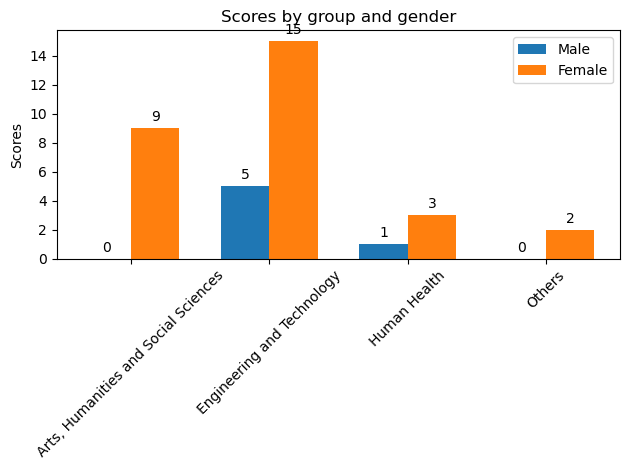

In [61]:
labels = ['Arts, Humanities and Social Sciences','Engineering and Technology','Human Health','Others']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Depression'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Depression'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

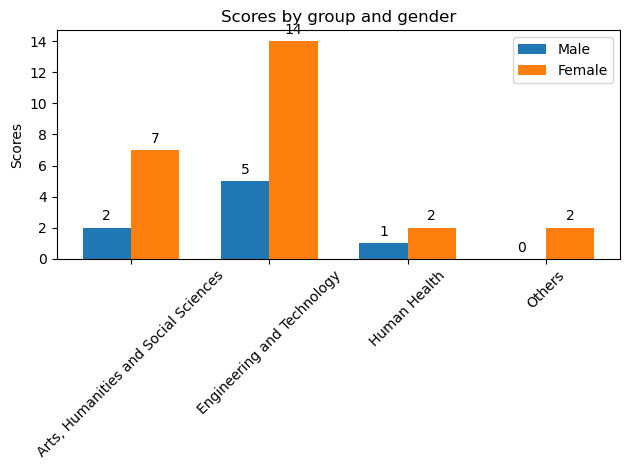

In [62]:
labels = ['Arts, Humanities and Social Sciences','Engineering and Technology','Human Health','Others']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Panic_Attack'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Panic_Attack'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

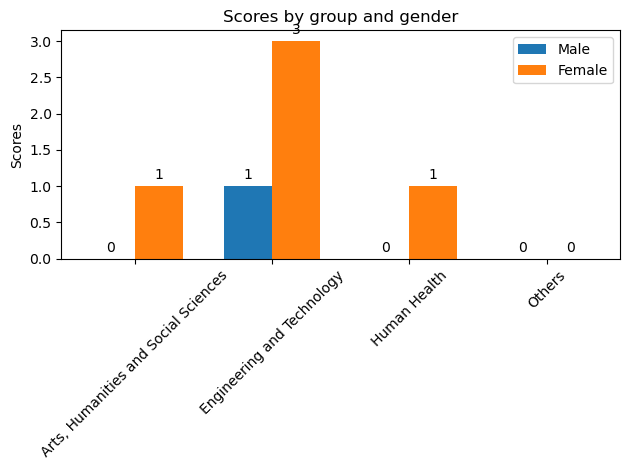

In [63]:
labels = ['Arts, Humanities and Social Sciences','Engineering and Technology','Human Health','Others']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Treatment'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Treatment'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

It is clear that students that major in Engineer and Technology are the most popular reporters that have senses of mental health issues and it demostrates again that female student have a tendancy to suffer from mental health issues more than male.

### Marital Status Analysis

In [64]:
tmp_df = data[['Timestamp','Depression', 'Anxiety', 'Panic_Attack', 'Treatment']].replace('No',np.nan)
df = pd.concat([tmp_df,data['Marital_Status']],axis=1).groupby(['Marital_Status']).count()
df

,Timestamp,Depression,Anxiety,Panic_Attack,Treatment
Marital_Status,,,,,
No,85,19,27,23,2
Yes,16,16,7,10,4


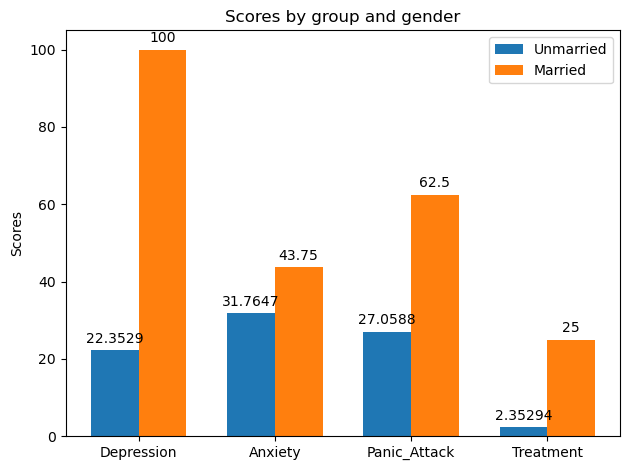

In [65]:
labels = ['Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
_y = df.loc['Yes',labels]/df.loc['Yes','Timestamp']*100
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df.loc['No',labels]/df.loc['No','Timestamp']*100,width, label='Unmarried')
rects2 = ax.bar(x + width/2,  df.loc['Yes',labels]/df.loc['Yes','Timestamp']*100,width, label='Married')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

We can see that the percentage of married students who said that they have mental health problems is higher than that of unmarried people. And it is surprising that 100% married students said that they had a sense of depression.

### All together now (Logistic Regression)

Okey, that's enough of analysing the isolated parameters. We have observed some fantastics statistics, but is it relevant to our problem?

Recall that our analysis should be based on different studying and demographic parameters of students. So, let's see which of aforementioned parameters really matter.

We are trying to predict whether a student have or does not have mental health problems (a student is considered as having mental problems if they have any symtoms of `anxiety`,`depression`,`panic attack`). The features related to a person using this regression analysis can be devided into 2 categories:
<li> Demographic features
    <ul>> Gender: catergorial, the gender of the student</ul>
    <ul>> Age: integer, the age of the student</ul>
    <ul>> Marital status: catergorial, the current status whether the student is married or not.</ul>
</li>
<li> Educational features
    <ul>> Course: catergorial, the course that student is pursuing</ul>
    <ul>> Year: catergorial, the current year that student is studying</ul>
    <ul>> CGPA: catergorial, The grade that student has achieved</ul>
</li>

In [66]:
data

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment,Age_Bins,Major
0,2020-08-07 12:02:00,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No,"(17, 21]",Engineering and Technology
1,2020-08-07 12:04:00,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No,"(17, 21]","Arts, Humanities and Social Sciences"
2,2020-08-07 12:05:00,Male,19.0,It,1,3.00 - 3.49,No,Yes,Yes,Yes,No,"(17, 21]",Engineering and Technology
3,2020-08-07 12:06:00,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No,"(21, 24]","Arts, Humanities and Social Sciences"
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No,"(21, 24]",Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:00,Female,21.0,Bcs,1,3.50 - 4.00,No,No,Yes,No,No,"(17, 21]",Engineering and Technology
97,2020-07-13 21:21:00,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No,"(17, 21]",Engineering and Technology
98,2020-07-13 21:22:00,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No,"(17, 21]",Human Health
99,2020-07-13 21:23:00,Female,23.0,Pendidikan islam,4,3.50 - 4.00,No,No,No,No,No,"(21, 24]","Arts, Humanities and Social Sciences"


In [67]:
cols = ['Gender','Age','Major','Year','CGPA','Marital_Status','Have Mental issues']
feature_cols = ['Gender','Age','Major','Year','CGPA','Marital_Status']

In [68]:
data['Have Mental issues']=(data[['Depression','Anxiety','Panic_Attack']] == 'Yes').any(axis=1)
data['Have Mental issues'].value_counts()

True     64
False    37
Name: Have Mental issues, dtype: int64

### Data imbalance

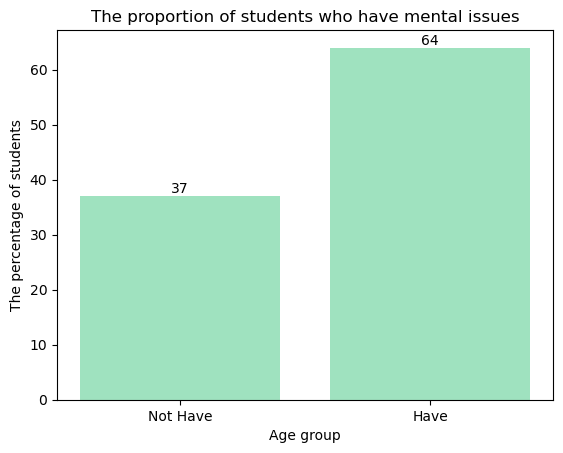

In [69]:
a = data['Have Mental issues'].value_counts()
#VISUALIZE
fig, ax = plt.subplots()
bars= ax.bar(a.index, a.values,color='#9FE2BF')
ax.bar_label(bars)
ax.set_title('The proportion of students who have mental issues')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Not Have','Have'])
ax.set_xlabel('Age group')
ax.set_ylabel('The percentage of students')
plt.show()

In [70]:
df = pd.DataFrame(data.loc[:,cols])
for col in df.columns[:]:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,Gender,Age,Major,Year,CGPA,Marital_Status,Have Mental issues
0,0,0,1,0,1,0,1
1,1,3,0,1,1,0,1
2,1,1,1,0,1,0,1
3,0,4,0,2,1,1,1
4,1,5,3,3,1,0,0


### Train-test split

In [71]:
X = df[feature_cols]
y = df['Have Mental issues']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Create pipeline

In [72]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', MinMaxScaler()),
    ('Logistic_Model',LogisticRegression(class_weight='balanced'))
])
full_pipeline

Pipeline(steps=[('preprocessor', MinMaxScaler()),
                ('Logistic_Model',
                 LogisticRegression(class_weight='balanced'))])

### Modeling

In [73]:

full_pipeline.fit(X_train, y_train)

results = full_pipeline.predict(X_train)
train_acc = accuracy_score(y_train, results)*100


y_pred = full_pipeline.predict(X_test)
val_acc = accuracy_score(y_pred, y_test)*100  



print(f"Train accuracy: {train_acc}")
print(f"Validation accuracy: {val_acc}")

Train accuracy: 68.57142857142857
Validation accuracy: 70.96774193548387


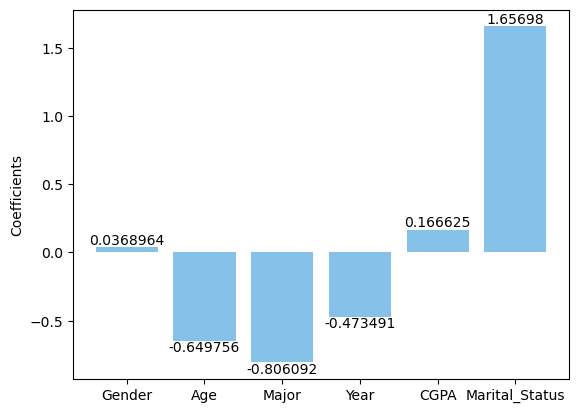

In [74]:
weights = full_pipeline['Logistic_Model'].coef_
a = data['Have Mental issues'].value_counts()
#VISUALIZE
fig, ax = plt.subplots()
bars= ax.bar(feature_cols, weights[0],color='#85C1E9')
ax.bar_label(bars)
ax.set_xticks(np.arange(len(feature_cols)))
ax.set_xticklabels(feature_cols)
ax.set_ylabel('Coefficients')
plt.show()

### Why marital status?

Look at again Maritial Analysis, we can see that 100% married students said that they have a sense of depression. So the outcome of the model is as we expected.

## <center>Conclusion</center>

    From our study, we can see that there are many interesting relationship between student background and their mental health issues:

1. **Year analysis**: 2nd or 3rd year students have higher risk of suffering from mental issues, while 1st and 2nd students would have higher probility to find the help from doctors. 
2. **CGPA analysis**: the higher GPA is, the higher the sense of mental health issues is.
3. **Age analysis**: We can see that low-age students have more feelings of anxiety and depression, while the risk of panic attack and the ratio of seeking treatment from doctor is larger in the high-age group.
4. **Major analysis**: students that major in Engineer and Technology are the most popular reporters that have senses of mental health issues

5. **Marital Status Analysis**: the percentage of married students who said that they have mental health problems is higher than that of unmarried people.
6. **Gender Analysis**: female student have a tendancy to suffer from mental health issues more than male.

7. **Modeling**: Marial status is the feature that effect the mental health among students most.

# Question 2. <center>When should students need to find the treatment from specialist?</center>

**Introduction**
As we think, a student would find the support from specialists when they have any symtoms of `anxiety`,`depression`,`panic attack`. However, this fact raise the question that whether they would have as we think in the real world? Therefore, we would find the answer for this question and from this, we can give useful advices for students to care more about their mental health.

**Step summary:**
1. **Mental health issues analysis**
2. **Preprocessing**
3. **Visualization**
4. **Modeling**

## Mental health issues analysis

In [75]:
tmp_df = data[['Timestamp','Depression', 'Anxiety', 'Panic_Attack']].replace('No',np.nan)
df = pd.concat([tmp_df,data['Treatment']],axis=1).groupby(['Treatment']).count()
df

,Timestamp,Depression,Anxiety,Panic_Attack
Treatment,,,,
No,95,29,31,29
Yes,6,6,3,4


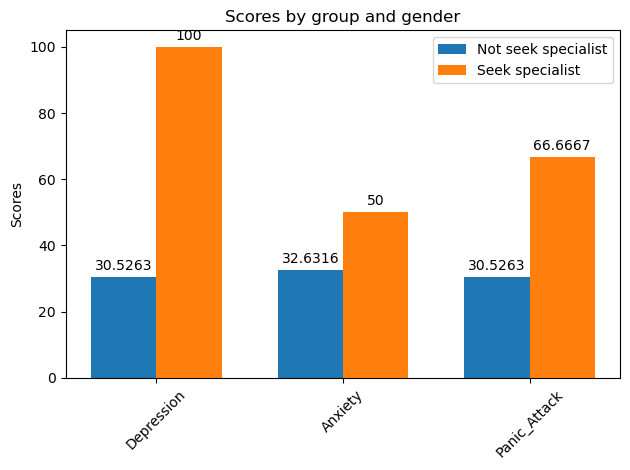

In [76]:
labels = ['Depression', 'Anxiety', 'Panic_Attack', ]
_y = df.loc['Yes',labels]/df.loc['Yes','Timestamp']*100
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df.loc['No',labels]/df.loc['No','Timestamp']*100,width, label='Not seek specialist')
rects2 = ax.bar(x + width/2,  df.loc['Yes',labels]/df.loc['Yes','Timestamp']*100,width, label='Seek specialist')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

A interesting point is that depression is the factor that decide whether a student would find any help from doctor or not.

# Preprocessing
#### One-hot encoding yes-no questions

For analysis with ease, I would use One-hot encoding.

In [77]:
df = data.copy()
for cols in df.columns[6:]:
    df[cols] = LabelEncoder().fit_transform(df[cols])
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment,Age_Bins,Major,Have Mental issues
0,2020-08-07 12:02:00,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,0,1,1
1,2020-08-07 12:04:00,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0,0,0,1
2,2020-08-07 12:05:00,Male,19.0,It,1,3.00 - 3.49,0,1,1,1,0,0,1,1
3,2020-08-07 12:06:00,Female,22.0,Law,3,3.00 - 3.49,1,1,0,0,0,1,0,1
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0,1,3,0


## Data Visualization

#### General observation of the distribution of values of attributes in data through visual charts after modifying data types.

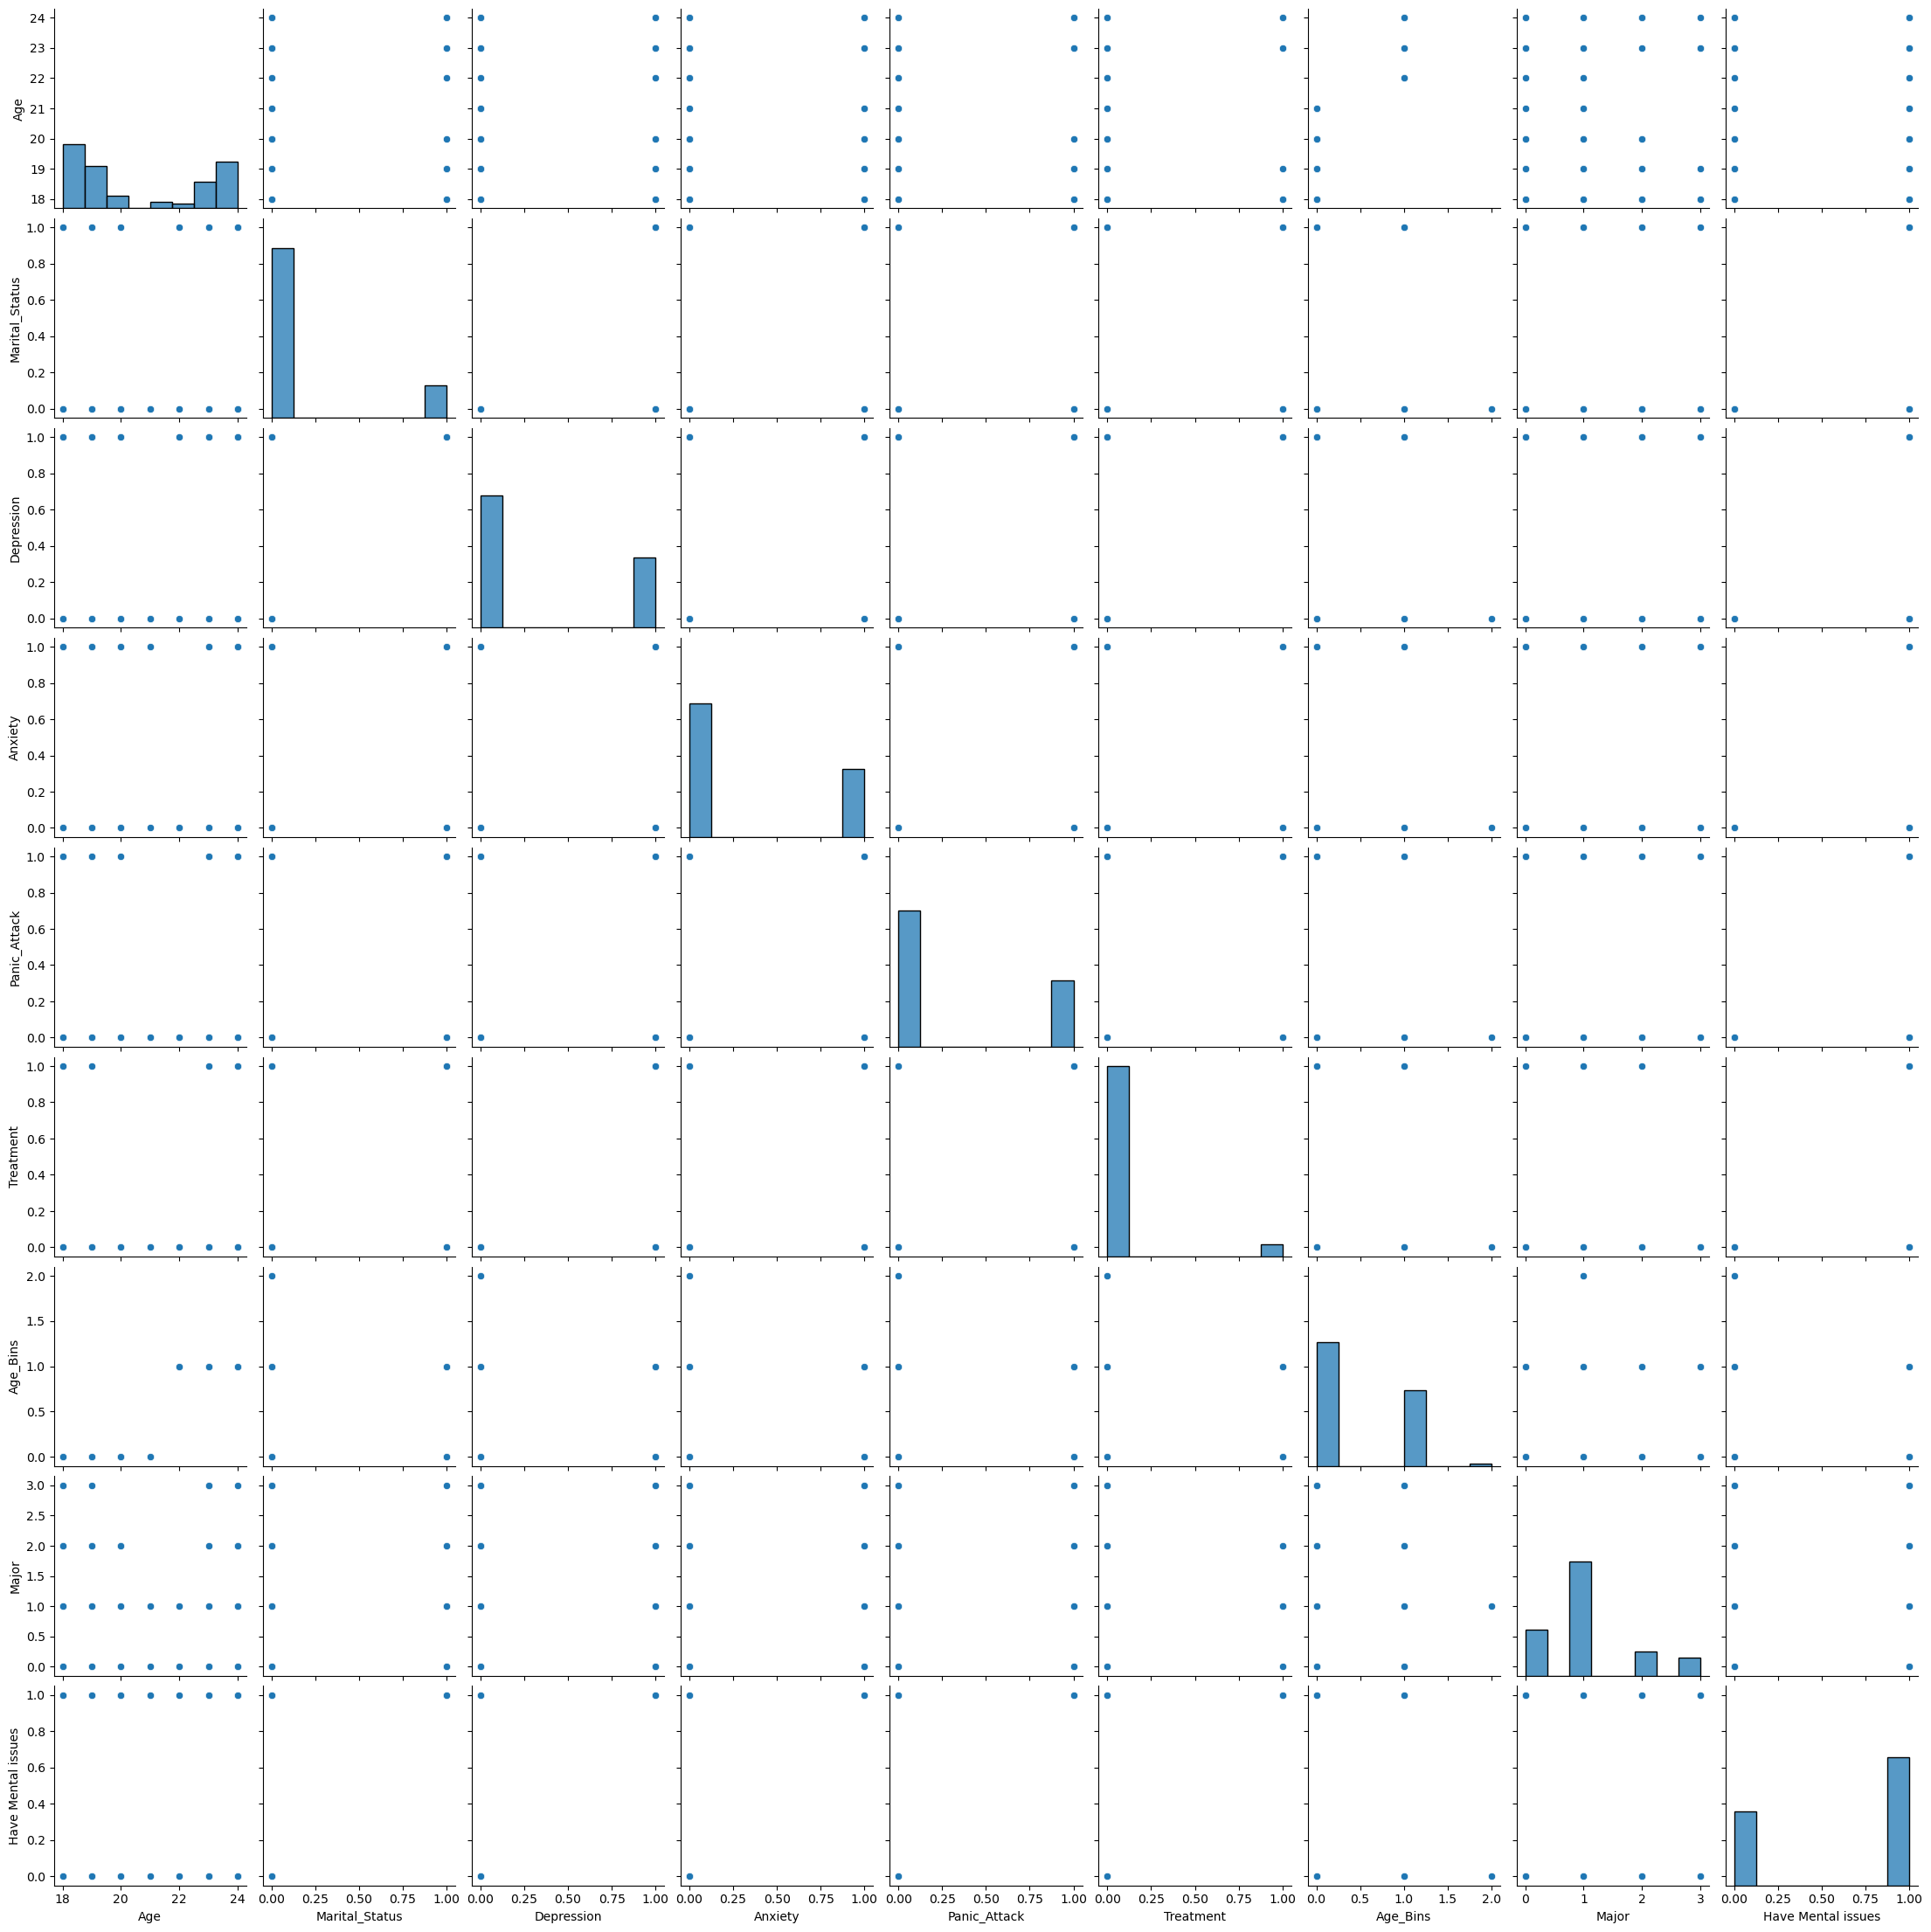

In [78]:
sns.pairplot(df)
plt.show()

#### General observation of the correlation of attributes in the data through the correlation matrix after modifying data types.

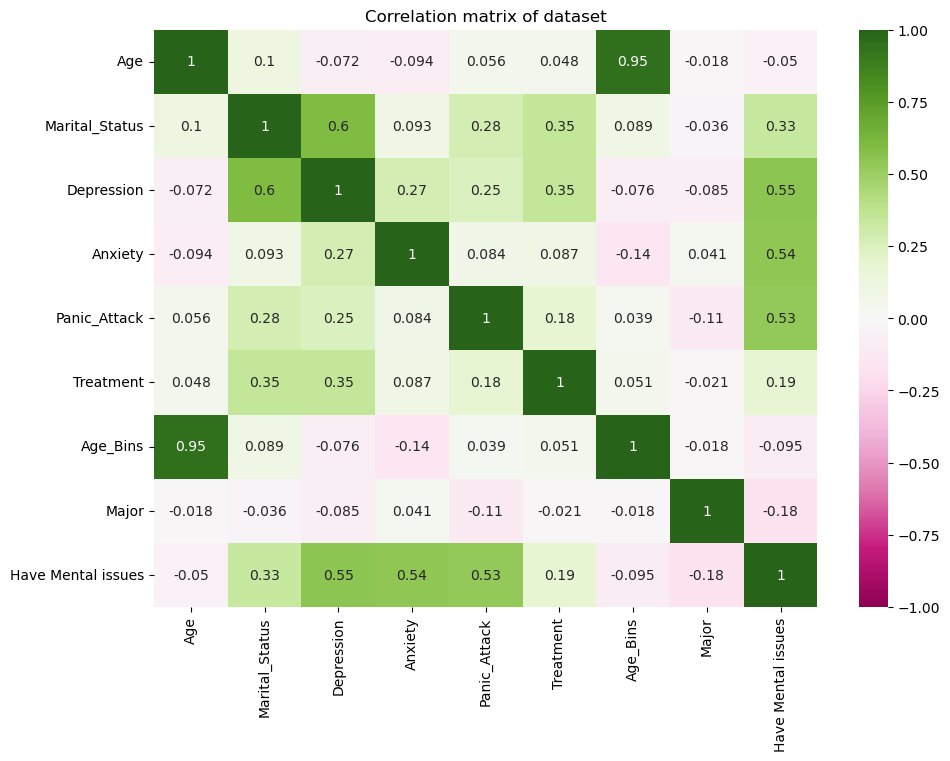

In [79]:
plt.figure(figsize=(10.7,7.5))
track_corr = sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap='PiYG', annot=True)
plt.title('Correlation matrix of dataset')
plt.show()

### All together now (Decision Tree)

We are trying to predict whether a student would seek treatment from specialists or not. The features related to a person using this model can be included as follow:
<li> Psychological features
    <ul>> Anxiety: interger, whether students have a sense of anxiety or not</ul>
    <ul>> Depression: integer, whether students have a sense of depression or not</ul>
    <ul>> panic attack: interger, whether students have a sense of panic attack or not</ul>
</li>

In [80]:
feature_cols = ['Depression','Anxiety','Panic_Attack']
X = df[feature_cols] # Features
y = df['Treatment'] # Target variable

### Data imbalance

In [81]:
#GET DATA
a = y.value_counts()

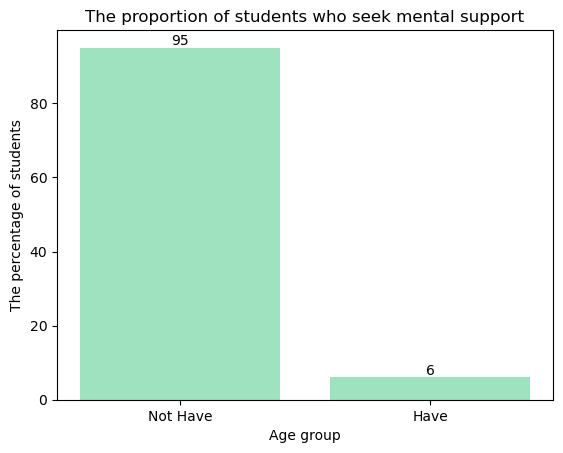

In [82]:
#VISUALIZE
fig, ax = plt.subplots()
bars= ax.bar(a.index, a.values,color='#9FE2BF')
ax.bar_label(bars)
ax.set_title('The proportion of students who seek mental support')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Not Have','Have'])
ax.set_xlabel('Age group')
ax.set_ylabel('The percentage of students')
plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, max_features = "auto", splitter = 'random')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

results = clf.predict(X_train)
train_acc = accuracy_score(y_train, results)*100


y_pred = clf.predict(X_test)
val_acc = accuracy_score(y_pred, y_test)*100  

#TRAIN ACCURACY
print(f"Train accuracy: {train_acc}")

#VALIDATION ACCURACY
print(f"Validation accuracy: {val_acc}")

Train accuracy: 97.14285714285714
Validation accuracy: 87.09677419354838


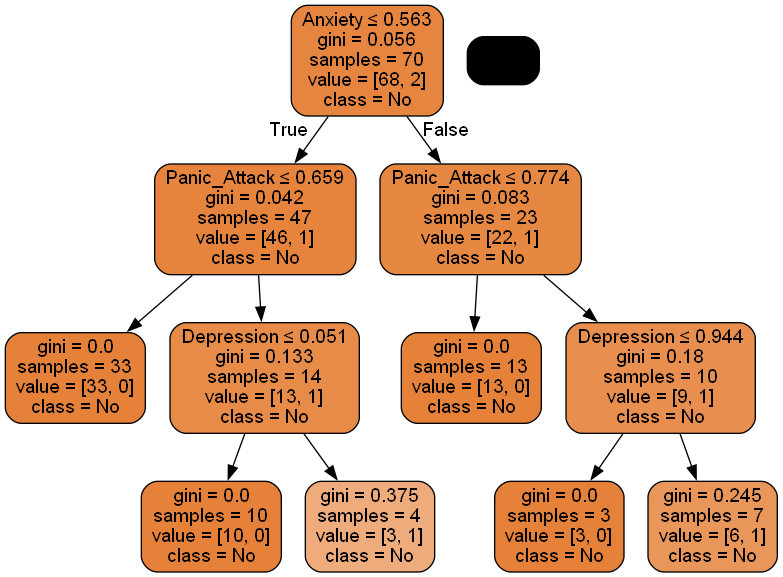

In [84]:
#VISUALIZE
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['No','Yes'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

As we can see, due to the fact that most students do not seek any treatment from doctors, our model have predicted all students do not need to find any mental health care

### Rebalance data

In [85]:
#GET DATA
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1) # 70% training and 30% test

In [86]:
#GET DATA
a = y_resampled.value_counts()

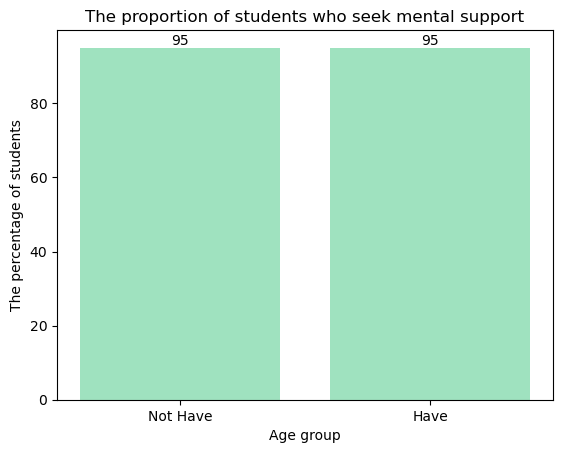

In [87]:
#VISUALIZE
fig, ax = plt.subplots()
bars= ax.bar(a.index, a.values,color='#9FE2BF')
ax.bar_label(bars)
ax.set_title('The proportion of students who seek mental support')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Not Have','Have'])
ax.set_xlabel('Age group')
ax.set_ylabel('The percentage of students')
plt.show()

In [88]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

results = clf.predict(X_train)
train_acc = accuracy_score(y_train, results)*100

y_pred = clf.predict(X_test)
val_acc = accuracy_score(y_pred, y_test)*100  

#TRAIN ACCURACY
print(f"Train accuracy: {train_acc}")
#VALIDATION ACCURACY
print(f"Validation accuracy: {val_acc}")

Train accuracy: 89.47368421052632
Validation accuracy: 91.22807017543859


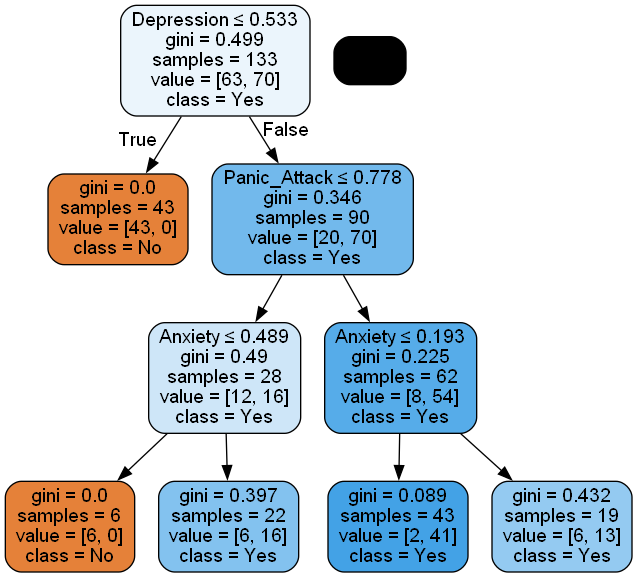

In [89]:
#VISUALIZE TREE
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['No','Yes'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

What stands out from the graph is that almost students just seek mental healthcare when they have full 3 symtoms of `anxiety`,`depression` and `panic attack`.

## <center>Conclusion</center>

    From our study, we can see that there are some fantastic points about the tendancy that students usually have when they find the treatment from doctors:

1. **Mental health issues analysis**:  depression is the factor that decide whether a student would find any help from doctor or not. 
2. **Modeling**: almost students just seek mental healthcare when they have full 3 symtoms of `anxiety`,`depression` and `panic attack`.